<a href="https://colab.research.google.com/github/kamrulkonok/UPC_ML_Project/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder

In [336]:
# merged data file
df = pd.read_csv("/content/airbnb_data.csv", index_col = 0)
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays


In [2]:
# merged data file
# df = pd.read_csv("./airbnb_data.csv")
# df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays


## Meaning of variables

- realSum : Price of accommodation for two people for two nights (EUR)
- room_type : type of accommodation ['Private room', 'Entire home/apt', 'Shared room']
- room_shared : variable for shared rooms ['True', 'False']
- room_private : variable for private rooms ['True', 'False']
- person_capacity : maximum number of guests
- host_is_superhost : superhost status ['True', 'False']
- multi : if listing belongs to host with 2-4 offers [0, 1]
- biz : if listing belongs to host with > 4 offers [0, 1]
- cleanliness_rating
- guest_satisfaction_overall : overall rating of listing
- bedrooms : number of bedrooms (0 for studios)
- dist : distance from city centre (in km)
- metro_dist : distance from nearest metro station (in km)
- attr_index : attraction index of listing location
- attr_index_norm : normalized attraction index (0 - 100)
- rest_index : restaurant index of listing location
- rest_index_norm : normalized restaurant index (0 - 100)
- lng : longitude
- lat : latitude
- city
- day_type : weekend or weekday

In [3]:
# Display basic information about the dataset
data_info = {
    "info": df.info(),
    "columns": df.columns.tolist(),
    "shape": df.shape,
    "data_types": df.dtypes.to_dict(),
    "missing_values": df.isnull().sum().to_dict(),
    "duplicate_values": df.duplicated().sum(),
    "sample_data": df.head().to_dict(orient="list")
}

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

{'info': None,
 'columns': ['realSum',
  'room_type',
  'room_shared',
  'room_private',
  'person_capacity',
  'host_is_superhost',
  'multi',
  'biz',
  'cleanliness_rating',
  'guest_satisfaction_overall',
  'bedrooms',
  'dist',
  'metro_dist',
  'attr_index',
  'attr_index_norm',
  'rest_index',
  'rest_index_norm',
  'lng',
  'lat',
  'city',
  'day_type'],
 'shape': (51707, 21),
 'data_types': {'realSum': dtype('float64'),
  'room_type': dtype('O'),
  'room_shared': dtype('bool'),
  'room_private': dtype('bool'),
  'person_capacity': dtype('float64'),
  'host_is_superhost': dtype('bool'),
  'multi': dtype('int64'),
  'biz': dtype('int64'),
  'cleanliness_rating': dtype('float64'),
  'guest_satisfaction_overall': dtype('float64'),
  'bedrooms': dtype('int64'),
  'dist': dtype('float64'),
  'metro_dist': dtype('float64'),
  'attr_index': dtype('float64'),
  'attr_index_norm': dtype('float64'),
  'rest_index': dtype('float64'),
  'rest_index_norm': dtype('float64'),
  'lng': dtype(

# Data Preprocessing

## 0. Basic checks

In [4]:
# checking for duplicates
df.duplicated().sum()

0

In [5]:
# check for NaNs
df.isna().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
day_type                      0
dtype: int64

In [6]:
# to showcase both numerical and categorical variables
df.describe(include='all')

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
count,51707.000000,51707,51707,51707,51707.000000,51707,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707,51707
unique,NaN,3,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2
top,NaN,Entire home/apt,False,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,london,weekends
freq,NaN,32648,51341,33014,NaN,38475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9993,26207
mean,279.879591,NaN,NaN,NaN,3.161661,NaN,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,NaN,NaN
std,327.948386,NaN,NaN,NaN,1.298545,NaN,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,NaN,NaN
min,34.779339,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,NaN,NaN
25%,148.752174,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,NaN,NaN
50%,211.343089,NaN,NaN,NaN,3.000000,NaN,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,NaN,NaN
75%,319.694287,NaN,NaN,NaN,4.000000,NaN,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,NaN,NaN


In [7]:
# categorical columns (including booleans & binary)
cat_columns = ['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz', 'city', 'day_type']

In [8]:
def print_unique_values(df, columns):
    # print all unique values in the specified columns of a dataframe.
    for column in columns:
        if column in df.columns:
            unique_values_counts = df[column].value_counts()
            print(f"Unique values in column '{column}' and their counts:")
            for value, count in unique_values_counts.items():
                print(f"{value}: {count}")
            print("\n")

In [9]:
# check if the categorical columns have the correct categories within
print_unique_values(df, cat_columns)

Unique values in column 'room_type' and their counts:
Entire home/apt: 32648
Private room: 18693
Shared room: 366


Unique values in column 'room_shared' and their counts:
False: 51341
True: 366


Unique values in column 'room_private' and their counts:
False: 33014
True: 18693


Unique values in column 'host_is_superhost' and their counts:
False: 38475
True: 13232


Unique values in column 'multi' and their counts:
0: 36642
1: 15065


Unique values in column 'biz' and their counts:
0: 33599
1: 18108


Unique values in column 'city' and their counts:
london: 9993
rome: 9027
paris: 6688
lisbon: 5763
athens: 5280
budapest: 4022
vienna: 3537
barcelona: 2833
berlin: 2484
amsterdam: 2080


Unique values in column 'day_type' and their counts:
weekends: 26207
weekdays: 25500




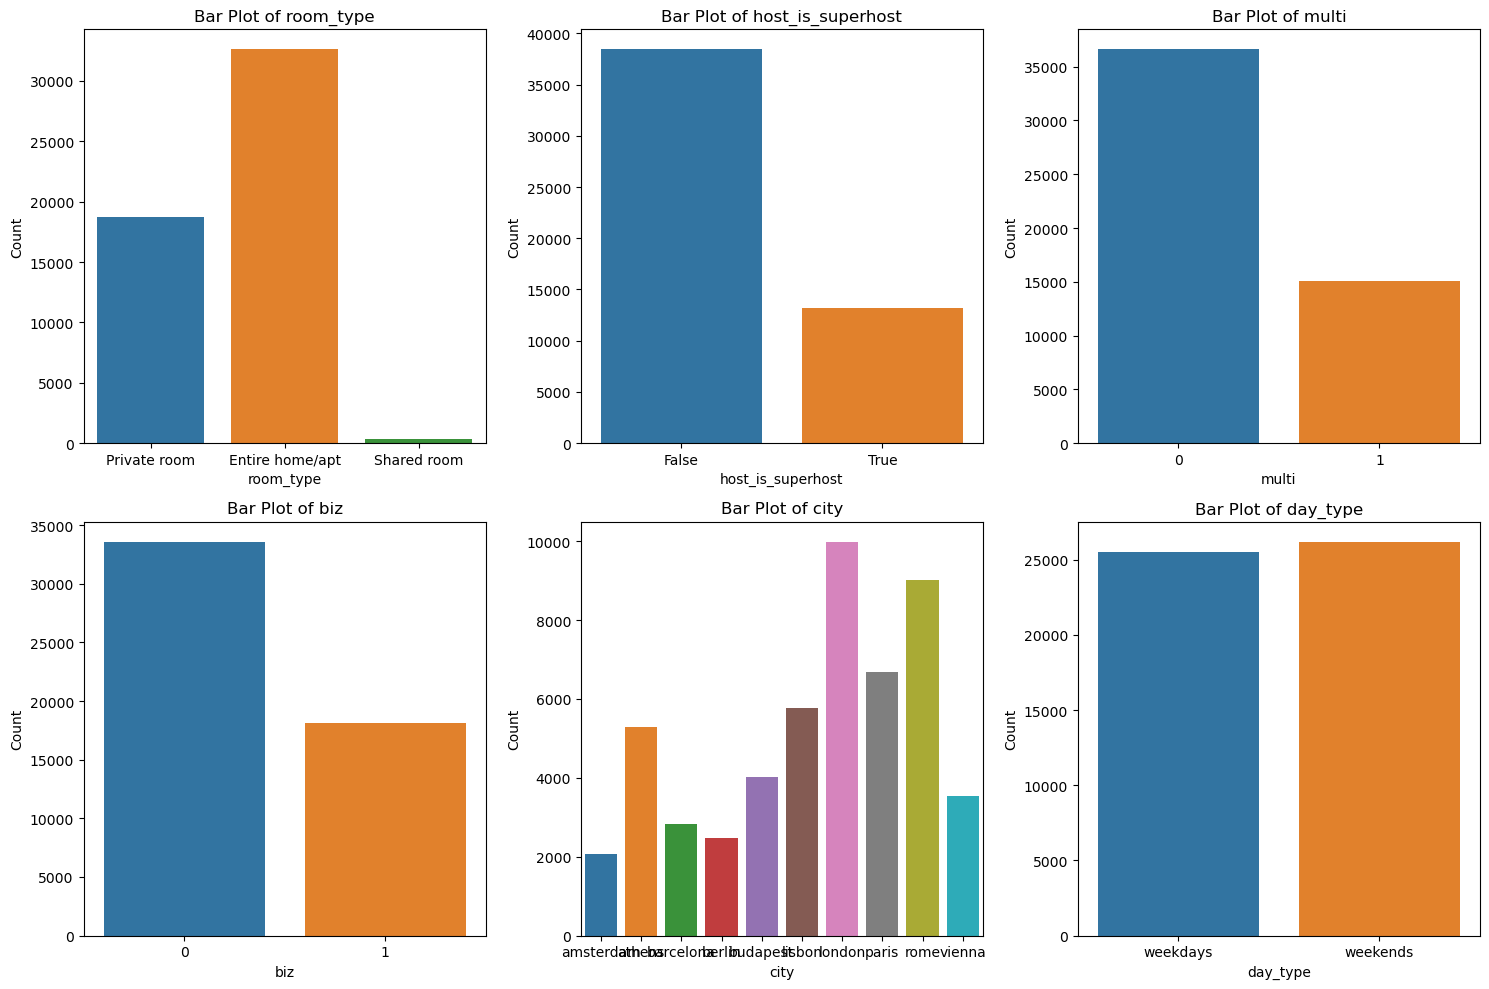

In [10]:
# Check if the data is balanced or not

categorical_columns = ["room_type", "host_is_superhost", "multi", "biz", "city", "day_type"]

plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[column])
    plt.title(f"Bar Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

# POI
- I can probably try to remove `room_shared` column? or try to make the data more stratifed through sampling? categorical imbalance in data.

* The analysis shows that listings with shared rooms (`room_shared` = True) have significantly lower average realSum compared to those without shared rooms. However, the number of entries for shared rooms is quite low (366 compared to 32648 for `entire home/ apt` and 18693 for `private room`).
- What is the difference between `room_shared`, `room_type` and `room_private` variables?

* The `room_shared` and `room_private` columns are redundant because their information is fully captured by the `room_type` column.

In [11]:
# Check the relationship between 'room_type', 'room_shared', and 'room_private'
room_type_vs_shared_private = df.groupby(['room_type', 'room_shared', 'room_private']).size()

room_type_vs_shared_private

room_type        room_shared  room_private
Entire home/apt  False        False           32648
Private room     False        True            18693
Shared room      True         False             366
dtype: int64

In [12]:
# Remove irrelevant and redundant columns (attr_index and rest_index as their normalized forms exist, and location coordinates)

cols_to_drop = ['room_shared', 'room_private', 'lng', 'lat', 'attr_index', 'rest_index']
df = df.drop(columns=cols_to_drop)

In [13]:
df.describe() # only numerical columns

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,13.423792,22.786177
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,9.807985,17.804096
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,0.926301,0.592757
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,6.380926,8.751480
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,11.468305,17.542238
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,17.415082,32.964603
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,100.000000,100.000000


## Dummy Encoding


When to Use Each
One-Hot Encoding: This is useful when you want to ensure no information is lost, which can be important for certain models, particularly those that do not suffer from multicollinearity issues (e.g., decision trees, neural networks).


Dummy Encoding: This is commonly used in linear models (e.g., linear regression, logistic regression) to avoid multicollinearity, which can cause issues in estimating the model parameters accurately.


https://stats.stackexchange.com/questions/231285/dropping-one-of-the-columns-when-using-one-hot-encoding/329281#329281

With linear regression, or generalized linear models estimated by maximum likelihood (or least squares) (in R this means using functions lm or glm), you need to leave out one column. Otherwise you will get a message about some columns "left out because of singularities".

But if you estimate such models with regularization, for example ridge, lasso er the elastic net, then you should not leave out any columns. The regularization takes care of the singularities, and more important, the prediction obtained may depend on which columns you leave out. That will not happen when you do not use regularization

## One Hot Encoding

Label Encodings are used when there is an inherent order between the categories i.e. 1, 2, 3 actually mean something in that order. But in our case, all the categories in a column are independent and don't represent any order. Therefore, we go with One Hot Encoding.

Applying one hot encoding to `room_type`, `city`, `day_type` columns which contains categorical values.

One-hot encoding isn't typically used for binary variables like True and False because it's redundant; the information is already encoded in a single binary feature.

True --> 1
False --> 0


In [14]:
# Ensure host_is_superhost is binary encoded
df['host_is_superhost'] = df['host_is_superhost'].astype(int)

# Define categorical features for one-hot encoding
categorical_features = ['room_type', 'city', 'day_type']

# Apply one-hot encoding
one_hot_encoder = OneHotEncoder(drop=None, sparse_output=False)
encoded_categorical_data = one_hot_encoder.fit_transform(df[categorical_features])

# Convert encoded data to a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Reset indices to avoid NaN values during concatenation
df = df.reset_index(drop=True)
encoded_categorical_df = encoded_categorical_df.reset_index(drop=True)

# Combine the encoded categorical data with the original data
df = pd.concat([df.drop(columns=categorical_features), encoded_categorical_df], axis=1)

# Display the columns to confirm the changes
print(df.columns)

Index(['realSum', 'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index_norm', 'rest_index_norm',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'city_amsterdam', 'city_athens',
       'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon',
       'city_london', 'city_paris', 'city_rome', 'city_vienna',
       'day_type_weekdays', 'day_type_weekends'],
      dtype='object')


In [15]:
df.head()

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends
0,194.033698,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,344.245776,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,264.101422,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,433.529398,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,485.552926,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 2. Finding Outliers

Since Machine learning models can be affected by high values, therefore it is important to take care / acknowledge the presence of outliers, if any.

### IQR

One easy criteria to decide which values are outliers is to use the distance between quartiles. Specifically, outliers are defined as :
* The values smaller than Q1 - 1.5*IQR
* The values bigger than Q3 + 1.5*IQR

In [16]:
df.describe()

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.255903,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,13.423792,22.786177,0.631404,0.361518,0.007078,0.040227,0.102114,0.054789,0.048040,0.077784,0.111455,0.193262,0.129344,0.174580,0.068405,0.493163,0.506837
std,327.948386,1.298545,0.436372,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,9.807985,17.804096,0.482429,0.480445,0.083835,0.196492,0.302801,0.227571,0.213853,0.267835,0.314698,0.394861,0.335584,0.379611,0.252441,0.499958,0.499958
min,34.779339,2.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,0.926301,0.592757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,6.380926,8.751480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,211.343089,3.000000,0.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,11.468305,17.542238,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,319.694287,4.000000,1.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,17.415082,32.964603,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,18545.450285,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


realSum, dist, metro_dist, attr_index_norm & rest_index_norm all have outliers.

In [17]:
# Function to find outliers using IQR for each column
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [18]:
outliers = find_outliers_iqr(df, 'realSum')
outliers.sort_values(by='realSum', ascending=False)['realSum']

3590     18545.450285
34803    16445.614689
24348    15499.894165
48380    13664.305916
50787    13656.358834
             ...     
45338      576.298132
40830      576.298132
8766       576.256197
630        576.242589
16312      576.209052
Name: realSum, Length: 3662, dtype: float64

In [19]:
df.describe()

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.255903,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,13.423792,22.786177,0.631404,0.361518,0.007078,0.040227,0.102114,0.054789,0.048040,0.077784,0.111455,0.193262,0.129344,0.174580,0.068405,0.493163,0.506837
std,327.948386,1.298545,0.436372,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,9.807985,17.804096,0.482429,0.480445,0.083835,0.196492,0.302801,0.227571,0.213853,0.267835,0.314698,0.394861,0.335584,0.379611,0.252441,0.499958,0.499958
min,34.779339,2.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,0.926301,0.592757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,6.380926,8.751480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,211.343089,3.000000,0.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,11.468305,17.542238,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,319.694287,4.000000,1.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,17.415082,32.964603,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,18545.450285,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
outliers.query('realSum > 1200')

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends
7,2771.307384,4.0,1,0,0,10.0,100.0,3,1.686807,1.458404,11.056528,18.975219,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,1609.917278,6.0,0,1,0,10.0,96.0,3,2.988589,1.750003,11.011222,16.847448,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92,1557.190730,4.0,1,0,0,9.0,98.0,2,0.750395,0.808683,44.173966,42.063930,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99,3004.944579,4.0,0,0,0,9.0,95.0,4,1.615295,1.402539,11.472769,19.762890,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
102,1376.514424,4.0,1,0,1,10.0,93.0,2,1.930702,1.585825,9.799591,17.310023,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47009,2311.738714,2.0,0,0,0,10.0,100.0,1,1.731672,1.054644,6.828503,17.853945,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
47039,1907.044163,5.0,0,1,0,6.0,60.0,3,2.978378,1.148510,15.739358,34.808324,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
48215,12942.991375,4.0,0,0,1,7.0,93.0,1,1.497979,0.396893,8.864325,4.685995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
48380,13664.305916,2.0,0,0,0,9.0,87.0,1,2.239501,0.414395,9.191812,4.818080,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Determine skewness

Interpretation of Skewness Values


Skewness ≈ 0: The data is fairly symmetrical.

Skewness > 0: The data is positively skewed (right-skewed), with a longer tail on the right side of the distribution.

Skewness < 0: The data is negatively skewed (left-skewed), with a longer tail on the left side of the distribution.

In [21]:
df.skew()

realSum                       21.419957
person_capacity                0.760003
host_is_superhost              1.118798
multi                          0.918395
biz                            0.628049
cleanliness_rating            -2.850286
guest_satisfaction_overall    -3.174908
bedrooms                       1.367776
dist                           1.731195
metro_dist                     4.060445
attr_index_norm                2.193167
rest_index_norm                1.097455
room_type_Entire home/apt     -0.544781
room_type_Private room         0.576497
room_type_Shared room         11.759724
city_amsterdam                 4.679991
city_athens                    2.628140
city_barcelona                 3.912867
city_berlin                    4.226999
city_budapest                  3.152929
city_lisbon                    2.469418
city_london                    1.553712
city_paris                     2.209107
city_rome                      1.714559
city_vienna                    3.419502


## 3. Transformations for Distribution

We have found from our EDA that `realSum` column has outliers due to its skewness, # What does this mean Konok?



Therefore apply log transformation to reduce it and creating a new column `price` to store the transformed values


Skewness is present in realSum, which is the y variable. If your target variable (y) is positively skewed, transforming it can often be beneficial. Many machine learning models, particularly linear models, assume that the target variable is normally distributed. Transforming a positively skewed y can help in meeting this assumption, leading to better model performance and more reliable predictions. It can also help in reducing the impact of outliers.

Skewness is also present in room_shared, because there are only 366 values supporting it. Same for room_type_shared.

Log Transformation : This is effective for data that are strictly positive.

# Feature Engineering

In [22]:
df['space_index'] = df['bedrooms'] * df['person_capacity']

df['metro_to_city_dist_ratio'] = df['metro_dist'] / df['dist']

In [23]:
df.head()

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends,space_index,metro_to_city_dist_ratio
0,194.033698,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.505554
1,344.245776,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.490191
2,264.101422,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.635251
3,433.529398,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,1.142945
4,485.552926,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.585038


# Distribution of the potential features

C:\apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\a

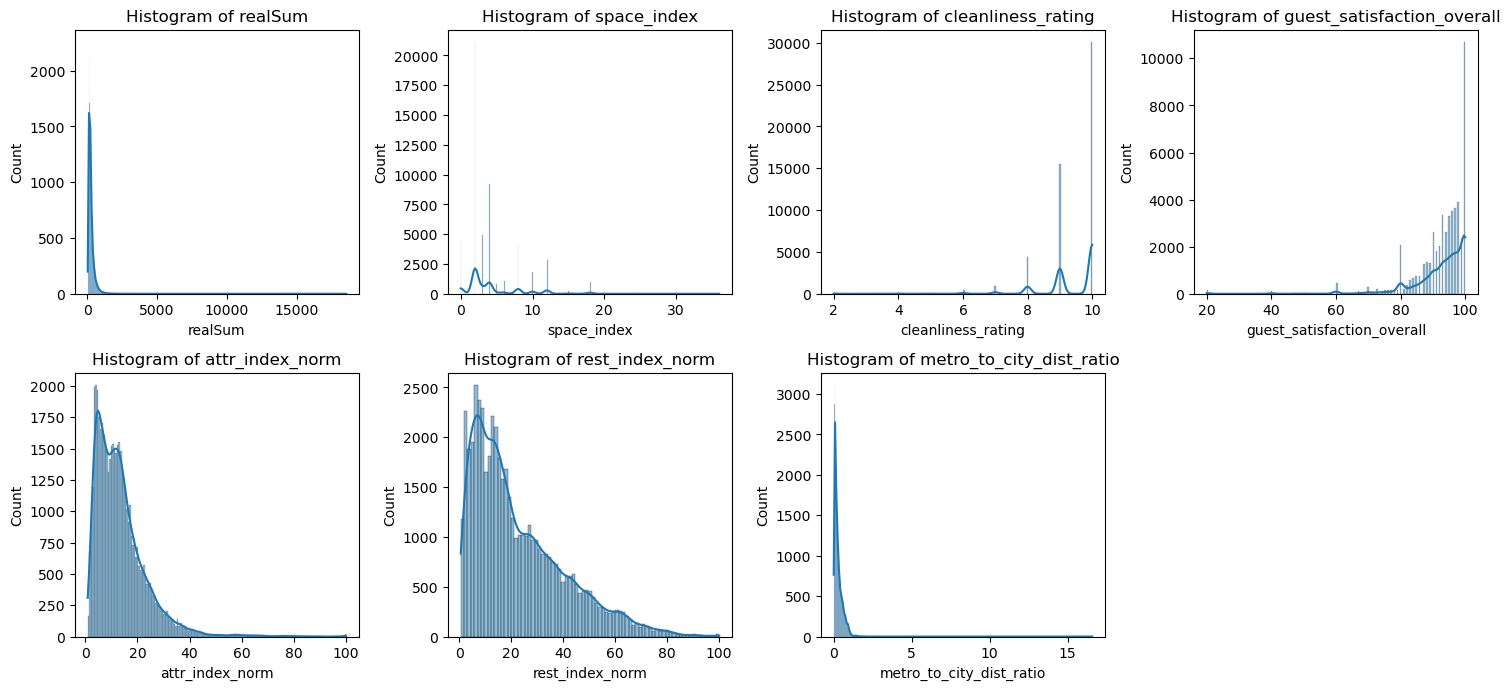

In [24]:
plt.figure(figsize=(15, 10))

# List of numerical columns to plot
numerical_columns = ["realSum", "space_index", "cleanliness_rating", "guest_satisfaction_overall",
                     "attr_index_norm", "rest_index_norm", "metro_to_city_dist_ratio"]

for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [25]:
df.skew()

realSum                       21.419957
person_capacity                0.760003
host_is_superhost              1.118798
multi                          0.918395
biz                            0.628049
cleanliness_rating            -2.850286
guest_satisfaction_overall    -3.174908
bedrooms                       1.367776
dist                           1.731195
metro_dist                     4.060445
attr_index_norm                2.193167
rest_index_norm                1.097455
room_type_Entire home/apt     -0.544781
room_type_Private room         0.576497
room_type_Shared room         11.759724
city_amsterdam                 4.679991
city_athens                    2.628140
city_barcelona                 3.912867
city_berlin                    4.226999
city_budapest                  3.152929
city_lisbon                    2.469418
city_london                    1.553712
city_paris                     2.209107
city_rome                      1.714559
city_vienna                    3.419502


## 4. Feature Scaling [WRITE THIS PART YOURSELF - IT SEEMS TO BE FROM LAB SESSIONS]

If you try to train a model with variables of ranges too far away it will be a disaster most of the times. Becasue the model might only "see" the bigger variable.

To avoid this issue you usualy normalize or standardize your data. This way you force all your variables to have the same range.
There are models that are very sensitive to this and might even fail to converge if you don't normalize your data.

In the context of data preprocessing, applying the right scaling method is crucial for improving the performance of machine learning models. Here are the most common transformations for normalizing the data along with the rationale for using Robust Scaling:

#### 1. Standardization
Standardization transforms the data so it has a mean of 0 and a standard deviation of 1. It is suitable for data that follows a Gaussian distribution (or approximately so).

$$
\text{Standardization:} \quad Z = \frac{X - \mu}{\sigma}
$$

#### 2. Min-Max Scaling
Min-Max Scaling transforms the data to fit within a specified range, typically [0, 1]. It is useful when you need to preserve the relationships of the data.

$$
\text{Min-Max Scaling:} \quad X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

#### 3. Box-Cox Transformation
Box-Cox Transformation transforms the data to make it more closely fit a normal distribution. It is useful for stabilizing variance and making the data more normal distribution-like.

$$
\text{Box-Cox Transformation:} \quad Y =
\begin{cases}
\frac{X^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(X) & \text{if } \lambda = 0
\end{cases}
$$

### Why Apply Robust Scaling?

Robust Scaling is particularly effective when the dataset contains outliers. Unlike standardization and min-max scaling, robust scaling uses statistics that are robust to outliers, such as the median and the interquartile range (IQR).

#### Robust Scaling
Robust Scaling transforms the data using the median and the IQR, which makes it less sensitive to outliers.

$$
\text{Robust Scaling:} \quad X_{\text{scaled}} = \frac{X - \text{Median}(X)}{\text{IQR}(X)}
$$

### Applying Robust Scaling to `dist` Feature

In this specific scenario, we applied Robust Scaling to the `dist` feature to handle potential outliers and ensure that the scaling process does not get skewed by extreme values

In [26]:
df['price'] = np.log(df['realSum'])
df = df.drop(columns=['realSum'])
df['metro_to_city_dist_ratio'] = np.log(df['metro_to_city_dist_ratio'])

# Apply Box-Cox transformation to the guest_satisfaction_overall column
columns_to_boxcox = ['guest_satisfaction_overall']
power_transformer = PowerTransformer(method='box-cox', standardize=False)
df['guest_satisfaction_overall'] = power_transformer.fit_transform(df[['guest_satisfaction_overall']] + 1)


C:\apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


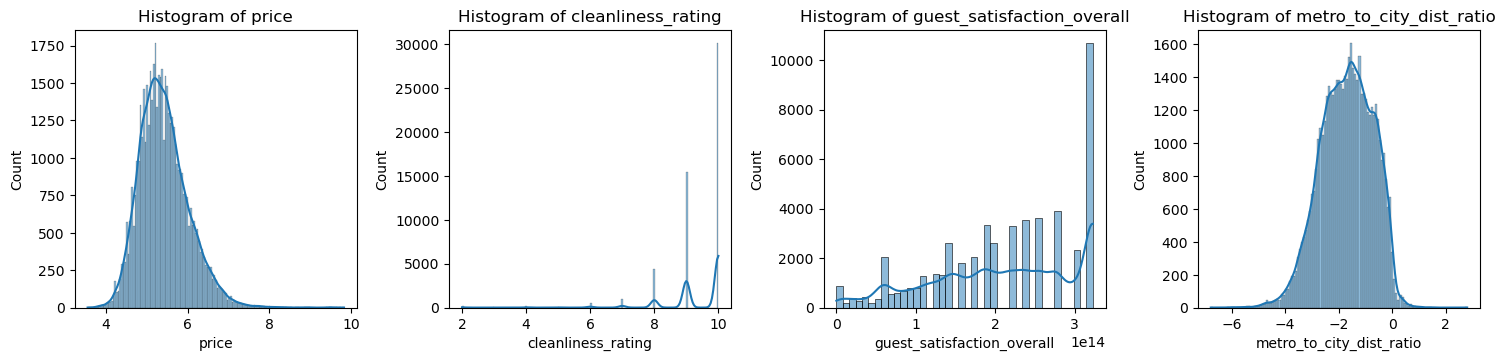

In [27]:
plt.figure(figsize=(15, 10))

# List of numerical columns to plot
numerical_columns = ["price", "cleanliness_rating", "guest_satisfaction_overall", "metro_to_city_dist_ratio"]

for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [28]:
df.skew()

person_capacity                0.760003
host_is_superhost              1.118798
multi                          0.918395
biz                            0.628049
cleanliness_rating            -2.850286
guest_satisfaction_overall    -0.395843
bedrooms                       1.367776
dist                           1.731195
metro_dist                     4.060445
attr_index_norm                2.193167
rest_index_norm                1.097455
room_type_Entire home/apt     -0.544781
room_type_Private room         0.576497
room_type_Shared room         11.759724
city_amsterdam                 4.679991
city_athens                    2.628140
city_barcelona                 3.912867
city_berlin                    4.226999
city_budapest                  3.152929
city_lisbon                    2.469418
city_london                    1.553712
city_paris                     2.209107
city_rome                      1.714559
city_vienna                    3.419502
day_type_weekdays              0.027350


Standardization has been applied to the log transformed feature to make sure they can feed into the regression model

In [29]:
standard_scaler = StandardScaler()
columns_to_scale = ['price', 'metro_to_city_dist_ratio', 'space_index']
df[columns_to_scale] = standard_scaler.fit_transform(df[columns_to_scale])
print(df[columns_to_scale].head())

      price  metro_to_city_dist_ratio  space_index
0 -0.253920                  1.043721    -0.563830
1  0.707075                  1.011956    -0.032003
2  0.262849                  1.278779    -0.563830
3  1.093609                  1.883336     1.031651
4  1.283568                  1.194023    -0.563830


Standardization is applied to the `cleanliness_rating` and `guest_satisfaction_overall` columns to ensure that these variables have zero mean and unit variance.

In [30]:
minmax_scaler = MinMaxScaler()

columns_to_standardize = ['cleanliness_rating', 'guest_satisfaction_overall']

df[columns_to_standardize] = minmax_scaler.fit_transform(df[columns_to_standardize])

print(df[columns_to_standardize].head())

   cleanliness_rating  guest_satisfaction_overall
0               1.000                    0.575995
1               0.750                    0.290887
2               0.875                    0.347063
3               0.875                    0.448981
4               1.000                    0.857603


Robust Scaler has been applied to reduce the impact of outliers

In [31]:
robust_scaler = RobustScaler()
columns_to_robust_scale = ['attr_index_norm', 'rest_index_norm']
df[columns_to_robust_scale] = robust_scaler.fit_transform(df[columns_to_robust_scale])
print(df[columns_to_robust_scale].head())

   attr_index_norm  rest_index_norm
0        -0.661727        -0.441734
1         1.989541         1.685065
2        -0.678112        -0.449985
3         1.327768         1.793710
4         1.613574         1.621825


In [32]:
df.describe()

,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends,space_index,metro_to_city_dist_ratio,price
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,5.170700e+04,5.170700e+04,5.170700e+04
mean,3.161661,0.255903,0.291353,0.350204,0.923828,0.648554,1.15876,3.191285,0.681540,0.177221,0.216574,0.631404,0.361518,0.007078,0.040227,0.102114,0.054789,0.048040,0.077784,0.111455,0.193262,0.129344,0.174580,0.068405,0.493163,0.506837,-5.166884e-17,9.894033e-17,-5.749533e-16
std,1.298545,0.436372,0.454390,0.477038,0.119359,0.280081,0.62741,2.393803,0.858023,0.888875,0.735308,0.482429,0.480445,0.083835,0.196492,0.302801,0.227571,0.213853,0.267835,0.314698,0.394861,0.335584,0.379611,0.252441,0.499958,0.499958,1.000010e+00,1.000010e+00,1.000010e+00
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.015045,0.002301,-0.955397,-0.700012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.095657e+00,-5.237588e+00,-3.135289e+00
25%,2.000000,0.000000,0.000000,0.000000,0.875000,0.448981,1.00000,1.453142,0.248480,-0.461057,-0.363058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.638302e-01,-7.094350e-01,-6.993653e-01
50%,3.000000,0.000000,0.000000,0.000000,1.000000,0.677087,1.00000,2.613538,0.413269,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.979166e-01,4.772252e-02,-1.106885e-01
75%,4.000000,1.000000,1.000000,1.000000,1.000000,0.926424,1.00000,4.263077,0.737840,0.538943,0.636942,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-3.200302e-02,7.684137e-01,5.830533e-01
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.00000,25.284557,14.273577,8.023423,3.405499,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.477232e+00,4.636545e+00,7.389379e+00


As the `bedrooms` and `person_capacity` has higher collinearity, therefore, combining them into one feature and naming it `space_index`, same logic has been applied to the `metro_to_city_dist_ratio`. This ratio shows how far the listing is from the metro station relative to the city center. A higher ratio indicates that the listing is closer to the city center compared to the metro.

In [33]:
# Ensure all columns in the DataFrame are numeric
numeric_df = df.select_dtypes(include=[float, int])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")

print(vif_data)

C:\apps\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       feature    VIF
0              person_capacity   6.37
1            host_is_superhost   1.18
2                        multi   1.38
3                          biz   1.60
4           cleanliness_rating   1.66
5   guest_satisfaction_overall   1.85
6                     bedrooms   9.75
7                         dist   5.05
8                   metro_dist   3.68
9              attr_index_norm   3.24
10             rest_index_norm   3.66
11   room_type_Entire home/apt    inf
12      room_type_Private room    inf
13       room_type_Shared room    inf
14              city_amsterdam    inf
15                 city_athens    inf
16              city_barcelona    inf
17                 city_berlin    inf
18               city_budapest    inf
19                 city_lisbon    inf
20                 city_london    inf
21                  city_paris    inf
22                   city_rome    inf
23                 city_vienna    inf
24           day_type_weekdays    inf
25          

# Removing reduntant features

In [34]:
cols_to_drop = ['bedrooms', 'person_capacity', 'dist', 'metro_dist']

df = df.drop(columns=cols_to_drop)
df.columns

Index(['host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'attr_index_norm', 'rest_index_norm',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'city_amsterdam', 'city_athens',
       'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon',
       'city_london', 'city_paris', 'city_rome', 'city_vienna',
       'day_type_weekdays', 'day_type_weekends', 'space_index',
       'metro_to_city_dist_ratio', 'price'],
      dtype='object')

Why are some values coming as infinite?

Because they after applying one hot encoding values either convert to 1 or 0, for 0 it is giving inf

In [35]:
# Ensure all columns in the DataFrame are numeric
numeric_df = df.select_dtypes(include=[float, int])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")

print(vif_data)

C:\apps\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       feature   VIF
0            host_is_superhost  1.18
1                        multi  1.38
2                          biz  1.57
3           cleanliness_rating  1.66
4   guest_satisfaction_overall  1.84
5              attr_index_norm  2.73
6              rest_index_norm  3.47
7    room_type_Entire home/apt   inf
8       room_type_Private room   inf
9        room_type_Shared room   inf
10              city_amsterdam   inf
11                 city_athens   inf
12              city_barcelona   inf
13                 city_berlin   inf
14               city_budapest   inf
15                 city_lisbon   inf
16                 city_london   inf
17                  city_paris   inf
18                   city_rome   inf
19                 city_vienna   inf
20           day_type_weekdays   inf
21           day_type_weekends   inf
22                 space_index  1.42
23    metro_to_city_dist_ratio  1.50
24                       price  2.93


In [36]:
df.head()

,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends,space_index,metro_to_city_dist_ratio,price
0,0,1,0,1.000,0.575995,-0.661727,-0.441734,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.563830,1.043721,-0.253920
1,0,0,0,0.750,0.290887,1.989541,1.685065,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.032003,1.011956,0.707075
2,0,0,1,0.875,0.347063,-0.678112,-0.449985,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.563830,1.278779,0.262849
3,0,0,1,0.875,0.448981,1.327768,1.793710,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.031651,1.883336,1.093609
4,1,0,0,1.000,0.857603,1.613574,1.621825,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.563830,1.194023,1.283568


In [37]:
# save to csv
df.to_csv('preprocessed_airbnb_data.csv', index=False)

In [ ]:
# df.to_csv('./preprocessed_airbnb_data.csv', index=False)